In [1]:
#Saving my account for sending my code to a quantum computer
from qiskit import IBMQ
IBMQ.save_account('acf5e23c3232554e7c62ff65ba53dfb686cd6554c6a02289486023ebd5338ead679b1ccb5c4bbe49a841afa35536de7699da892be142c17b7de06fc039accc28')
IBMQ.load_account()

configrc.store_credentials:WARNING:2021-04-10 18:28:49,284: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

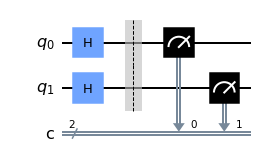

In [95]:
from qiskit import *

#Build the quantum circuit 
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)


#Creating the measurement
meas = QuantumCircuit(2,2)
meas.barrier(range(2))
meas.measure(range(2), range(2))

qc = circ+meas

qc.draw('mpl')

In [96]:
from qiskit import Aer 
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim)

# Grab the results from the job.
result_sim = job_sim.result()

In [99]:
result = execute(circ, backend).result()
counts  = result.get_counts(circ)
print(counts)

QiskitError: 'No counts for experiment "     ┌───┐\nq_0: ┤ H ├\n     ├───┤\nq_1: ┤ H ├\n     └───┘"'

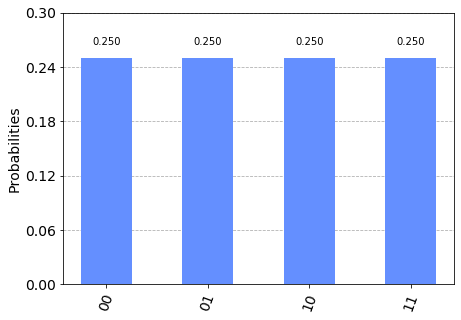

In [98]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [20]:
import numpy as np
#This creates an unitary matrix that represent all the global operation thath 
#we have performes to the system. 
#This can be non analytic? 
#Can be useful for rapidly compare two different systems.
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print(np.around(result.get_unitary(circ, decimals=3),5))

[[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5+0.j -0.5+0.j  0.5-0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]]


In [ ]:
#####PER 1 QUBIT

In [110]:
#Per 1 qbit: 
#Ex
import numpy as np

prob_final = [0.25, 0.75]  

estat_final = np.sqrt(prob_final)

theta = 2*np.arccos(estat_final[0])
print(180*theta/np.pi)

phi = 0

119.99999999999999


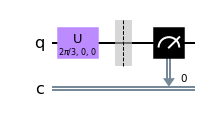

In [111]:
circ = QuantumCircuit(1)
circ.u(theta, phi,0, 0)



#Creating the measurement
meas = QuantumCircuit(1,1)
meas.barrier(range(1))
meas.measure(range(1), range(1))

qc = circ+meas

qc.draw('mpl')


In [112]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print(np.around(result.get_unitary(circ, decimals=3),5))

[[ 0.5    +0.j -0.86603+0.j]
 [ 0.86603+0.j  0.5    +0.j]]


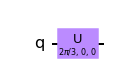

In [113]:
circ.draw('mpl')

In [114]:
from qiskit import Aer 
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim)

# Grab the results from the job.
result_sim = job_sim.result()

In [115]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(qc,backend = simulator, shots = 3000).result()

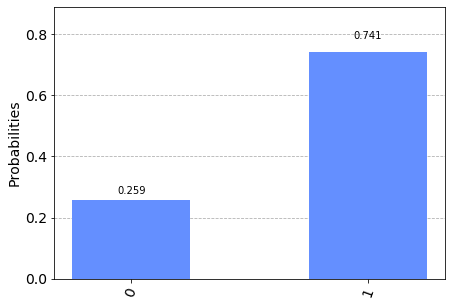

In [116]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(sim_result.get_counts(qc))